In [26]:
import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate  # Replace cross_validation with model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [27]:
df = pd.read_csv('bitcoin-prediction-master/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.isnull().values.any()
df.head(1)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [28]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [29]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [30]:
new_df.head()

,Close
Date,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


Text(0, 0.5, '$(Dollar)')

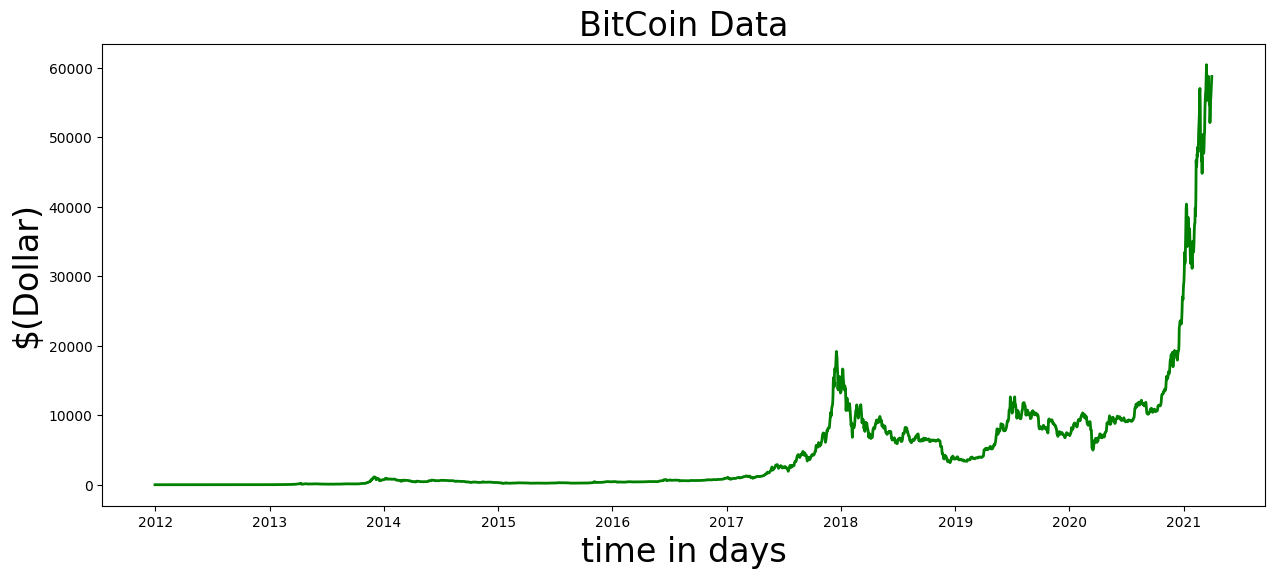

In [31]:
plt.plot(new_df,color='green', lw=2)
plt.title("BitCoin Data",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


df=new_df
forecast_out = int(20)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop('Prediction', axis=1))

X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#self-built linear regression
class CustomLinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        # calculating weights using the normal equation: w = (X^T * X)^-1 * X^T * y
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        # Calculate predictions
        return X @ self.weights

# creating an instance
custom_lr = CustomLinearRegression()

custom_lr.fit(X_train, y_train)

# making predictions on test set
cross_validation = custom_lr.predict(X_test)

# uses R-squared as the confidence metric
residuals = y_test - cross_validation
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
confidence = 1 - (ss_res / ss_tot)
print("Confidence (R-squared): ", confidence)

# predictions for the forecast
forecast_predictions = custom_lr.predict(X_forecast)
print("Forecast Predictions: ", forecast_predictions)


Confidence (R-squared):  0.9623371267846078
Forecast Predictions:  [63721.19928577 65943.87950984 67803.47154955 64487.39423184
 62048.8753924  62969.21273008 65572.14602884 65360.04051023
 65918.1975408  64267.90245507 63676.86853325 61333.02424782
 61806.12811548 58429.08650029 59688.1514409  61884.14908066
 62603.58221171 63819.54607865 65431.31356608 65900.8528743 ]


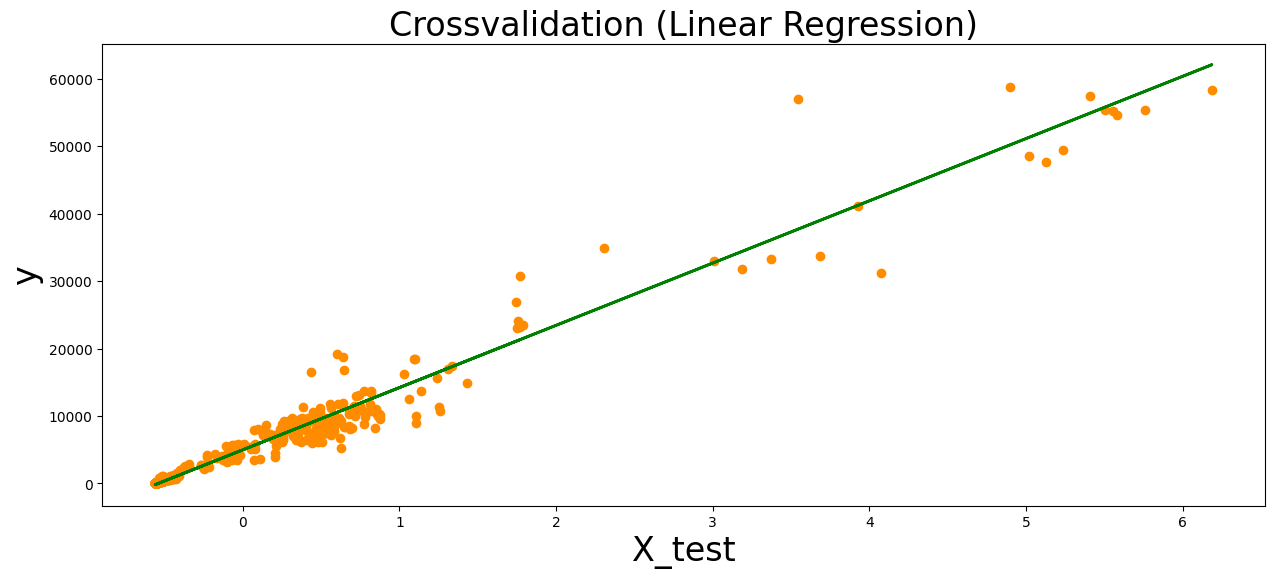

In [33]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='test_data')
plt.plot(X_test, cross_validation, color='green', linewidth=2,label='predicted data')
# plt.plot(new_df,color='green', lw=2)
plt.title("Crossvalidation (Linear Regression)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

1656.2467724223848


In [35]:
last_date = new_df.iloc[-1].name
print(last_date)

2021-03-31


In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_predictions))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_predictions})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-31 to 2021-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Close  Prediction
Date                            
2011-12-31  4.471603    6.835000
2012-01-01  4.806667    6.386000
2012-01-02  5.000000    6.485000
2012-01-03  5.252500    6.407500
2012-01-04  5.208159    6.495556


Text(0, 0.5, '$(Dollar)')

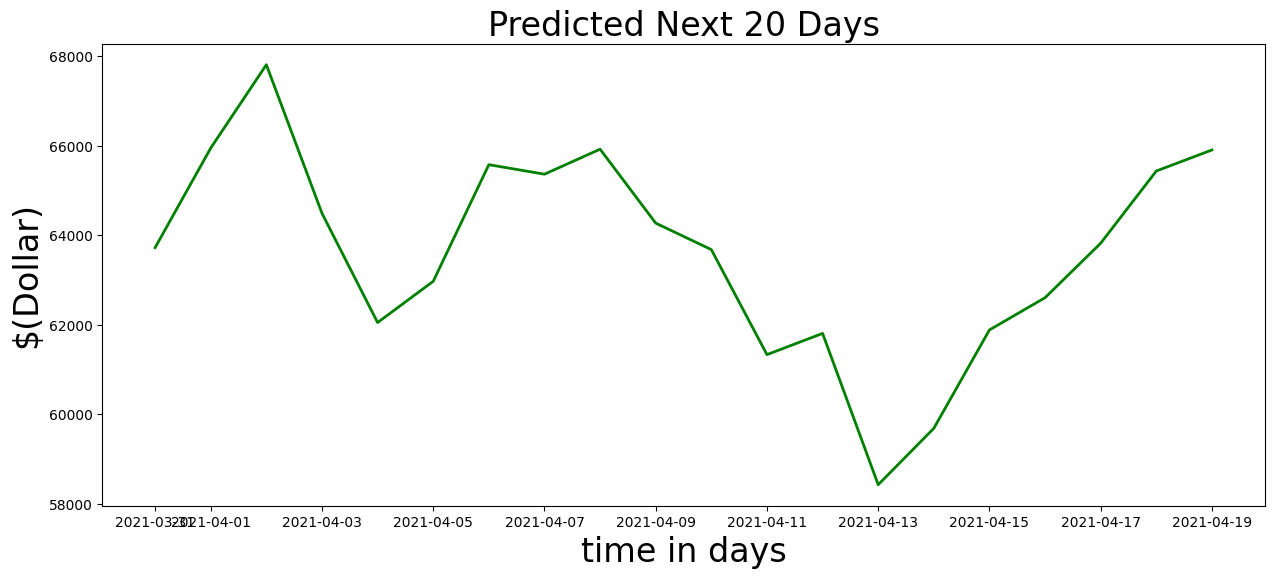

In [37]:
plt.plot(df1,color='green', lw=2)
plt.title("Predicted Next 20 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

Text(0, 0.5, '$(Dollar)')

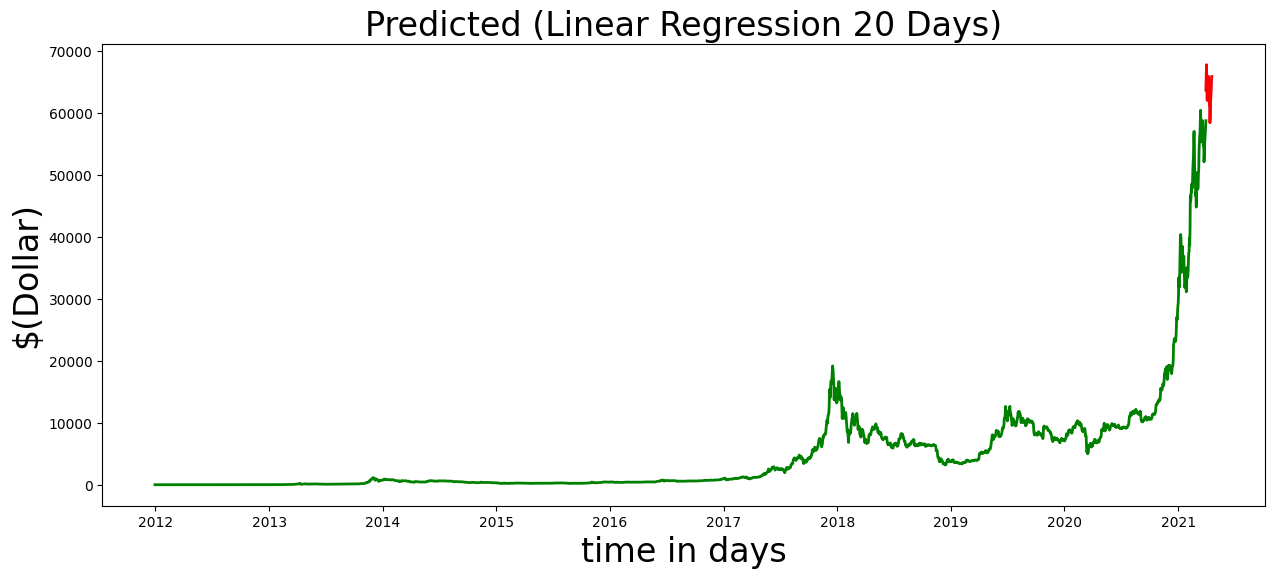

In [38]:
plt.plot(df1,)
plt.plot(df['Close'],color='green', lw=2, label='Bitcoin Data')
plt.plot(df1['Close'],color='red', lw=2, label='Predicted')
plt.title("Predicted (Linear Regression 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)